In [37]:
import requests

url_get = requests.get("https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019")

In [38]:
url_get.content[1:777]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://monexnews.com/" target="_self" />\n<title>Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews</title>\n<meta name="description" content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " />\n<meta name="keywords" content="Kurs yen, jpy, nilai tukar yen, monexnews" />\n<meta property="og:image" content="favicon.jpg" />\n<meta name="author" content="Ultimaengine.co'

In [39]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [40]:
print(soup.prettify()[:2048])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://monexnews.com/" target="_self"/>
  <title>
   Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews
  </title>
  <meta content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " name="description"/>
  <meta content="Kurs yen, jpy, nilai tukar yen, monexnews" name="keywords"/>
  <meta content="favicon.jpg" property="og:image"/>
  <meta content="Ultimaengine.com" name="author"/>
  <meta content="follow, index" name="robots"/>
  <meta content="7 days" name="revisit-after"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="M7NOlgqcEadhl

In [42]:
table = soup.find('table', attrs={'class':'table'})
print(table.prettify()[1:500])

table class="table">
 <tr>
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   31 Desember 2019
  </td>
  <td>
   128,62
  </td>
  <td>
   127,32
  </td>
 </tr>
 <tr>
  <td>
   30 Desember 2019
  </td>
  <td>
   128,30
  </td>
  <td>
   127,02
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   27 Desember 2019
  </td>
  <td>
   128,11
  </td>
  <td>
   126,83
  </td>
 </tr>
 <tr>
  <td>
   26 Desember 2019
  </td>
  <td>
   128,


In [43]:
tr = table.find_all('tr')
tr[:2] # just call 2 founded tr

[<tr>
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>31 Desember 2019</td>
 <td>128,62</td>
 <td>127,32</td>
 </tr>]

In [44]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get tanggal
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip() #for removing the excess whitespace
    tanggal = tanggal.replace(u'\xa0', u' ')
    
    #get ask
    ask = row.find_all('td')[1].text
    ask = ask.strip() #for removing the excess whitespace
    
    #get bid
    bid = row.find_all('td')[2].text
    bid = ask.strip() #for removing the excess whitespace
    
    temp.append((tanggal,ask,bid)) 
    
temp 

[('31 Desember 2019', '128,62', '128,62'),
 ('30 Desember 2019', '128,30', '128,30'),
 ('27 Desember 2019', '128,11', '128,11'),
 ('26 Desember 2019', '128,27', '128,27'),
 ('23 Desember 2019', '128,39', '128,39'),
 ('20 Desember 2019', '128,63', '128,63'),
 ('19 Desember 2019', '128,24', '128,24'),
 ('18 Desember 2019', '128,64', '128,64'),
 ('17 Desember 2019', '128,62', '128,62'),
 ('16 Desember 2019', '128,67', '128,67'),
 ('13 Desember 2019', '128,30', '128,30'),
 ('12 Desember 2019', '130,04', '130,04'),
 ('11 Desember 2019', '129,65', '129,65'),
 ('10 Desember 2019', '129,56', '129,56'),
 ('09 Desember 2019', '129,76', '129,76'),
 ('06 Desember 2019', '129,78', '129,78'),
 ('05 Desember 2019', '130,10', '130,10'),
 ('04 Desember 2019', '130,79', '130,79'),
 ('03 Desember 2019', '130,15', '130,15'),
 ('02 Desember 2019', '129,36', '129,36'),
 ('29 November 2019', '129,44', '129,44'),
 ('28 November 2019', '129,47', '129,47'),
 ('27 November 2019', '129,84', '129,84'),
 ('26 Novem

In [45]:
temp = temp[::-1]
temp

[('02 Januari 2019', '132,89', '132,89'),
 ('03 Januari 2019', '135,44', '135,44'),
 ('04 Januari 2019', '133,51', '133,51'),
 ('07 Januari 2019', '130,86', '130,86'),
 ('08 Januari 2019', '129,84', '129,84'),
 ('09 Januari 2019', '130,31', '130,31'),
 ('10 Januari 2019', '131,22', '131,22'),
 ('11 Januari 2019', '130,62', '130,62'),
 ('14 Januari 2019', '130,52', '130,52'),
 ('15 Januari 2019', '130,56', '130,56'),
 ('16 Januari 2019', '131,11', '131,11'),
 ('17 Januari 2019', '130,61', '130,61'),
 ('18 Januari 2019', '130,37', '130,37'),
 ('21 Januari 2019', '130,31', '130,31'),
 ('22 Januari 2019', '130,39', '130,39'),
 ('23 Januari 2019', '130,05', '130,05'),
 ('24 Januari 2019', '129,79', '129,79'),
 ('25 Januari 2019', '129,68', '129,68'),
 ('28 Januari 2019', '128,97', '128,97'),
 ('29 Januari 2019', '129,74', '129,74'),
 ('30 Januari 2019', '129,79', '129,79'),
 ('31 Januari 2019', '129,92', '129,92'),
 ('01 Februari 2019', '129,05', '129,05'),
 ('04 Februari 2019', '128,24', '

In [46]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('tanggal', 'ask', 'bid'))
df.head()

,tanggal,ask,bid
0,02 Januari 2019,"132,89","132,89"
1,03 Januari 2019,"135,44","135,44"
2,04 Januari 2019,"133,51","133,51"
3,07 Januari 2019,"130,86","130,86"
4,08 Januari 2019,"129,84","129,84"


In [53]:
df['ask'] = df['ask'].str.replace(",",".")
df['bid'] = df['bid'].str.replace(",",".")

df.head()

AttributeError: Can only use .str accessor with string values!

In [48]:
import dateparser

In [49]:
df['tanggal'] = df['tanggal'].apply(lambda x: dateparser.parse(x))

In [57]:
df

,tanggal,ask,bid
0,2019-01-02,132.89,132.89
1,2019-01-03,135.44,135.44
2,2019-01-04,133.51,133.51
3,2019-01-07,130.86,130.86
4,2019-01-08,129.84,129.84
...,...,...,...
241,2019-12-23,128.39,128.39
242,2019-12-26,128.27,128.27
243,2019-12-27,128.11,128.11
244,2019-12-30,128.30,128.30


In [55]:
df[['ask', 'bid']] = df[['ask', 'bid']].astype('float64')

df.dtypes

tanggal    datetime64[ns]
ask               float64
bid               float64
dtype: object

In [63]:
df = df.set_index("tanggal")

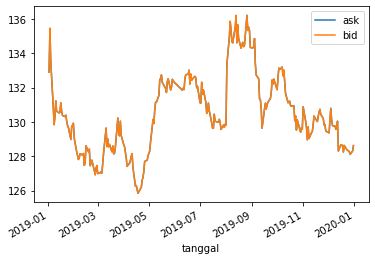

In [64]:
df.plot()